In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Construct parameter grid

In [2]:
N_vec = np.array([1e4,1e5,1e6,1e7])
Nmu_vec = np.array([1e-2,1e-1,1,1e1,1e2])
demu_vec = np.array([1,10,100,1000,10000])
saneu_vec = np.array([1.02])
saneu_vec2 = np.array([1.05])
smutaneu_vec = np.array([1/4])
squot_vec = np.array([1.001,1.005,1.01,1.05])

In [71]:
para_space=np.array([np.array([N, δ, μ, w_aneu, w_mut_aneu, w_mut]) for N in N_vec for δ in Nmu_vec/N for μ in demu_vec*δ for w_aneu in saneu_vec for w_mut in squot_vec*w_aneu for w_mut_aneu in w_mut*smutaneu_vec+w_aneu*(1-smutaneu_vec)] )
para_space

array([[1.000000e+04, 1.000000e-06, 1.000000e-06, 1.020000e+00,
        1.020255e+00, 1.021020e+00],
       [1.000000e+04, 1.000000e-06, 1.000000e-06, 1.020000e+00,
        1.021275e+00, 1.025100e+00],
       [1.000000e+04, 1.000000e-06, 1.000000e-06, 1.020000e+00,
        1.022550e+00, 1.030200e+00],
       ...,
       [1.000000e+07, 1.000000e-05, 1.000000e-01, 1.020000e+00,
        1.021275e+00, 1.025100e+00],
       [1.000000e+07, 1.000000e-05, 1.000000e-01, 1.020000e+00,
        1.022550e+00, 1.030200e+00],
       [1.000000e+07, 1.000000e-05, 1.000000e-01, 1.020000e+00,
        1.032750e+00, 1.071000e+00]])

In [72]:
len(para_space)

400

In [73]:
para_space2=np.array([np.array([N, δ, μ, w_aneu, w_mut_aneu, w_mut]) for N in N_vec for δ in Nmu_vec/N for μ in demu_vec*δ for w_aneu in saneu_vec2 for w_mut in squot_vec*w_aneu for w_mut_aneu in w_mut*smutaneu_vec+w_aneu*(1-smutaneu_vec)] )
para_space2

array([[1.0000000e+04, 1.0000000e-06, 1.0000000e-06, 1.0500000e+00,
        1.0502625e+00, 1.0510500e+00],
       [1.0000000e+04, 1.0000000e-06, 1.0000000e-06, 1.0500000e+00,
        1.0513125e+00, 1.0552500e+00],
       [1.0000000e+04, 1.0000000e-06, 1.0000000e-06, 1.0500000e+00,
        1.0526250e+00, 1.0605000e+00],
       ...,
       [1.0000000e+07, 1.0000000e-05, 1.0000000e-01, 1.0500000e+00,
        1.0513125e+00, 1.0552500e+00],
       [1.0000000e+07, 1.0000000e-05, 1.0000000e-01, 1.0500000e+00,
        1.0526250e+00, 1.0605000e+00],
       [1.0000000e+07, 1.0000000e-05, 1.0000000e-01, 1.0500000e+00,
        1.0631250e+00, 1.1025000e+00]])

In [74]:
len(para_space2)

400

In [77]:
para_space[1]

array([1.000000e+04, 1.000000e-06, 1.000000e-06, 1.020000e+00,
       1.021275e+00, 1.025100e+00])

In [75]:
np.save('para_space.npy', para_space, allow_pickle=True) 

In [76]:
np.save('para_space2.npy', para_space2, allow_pickle=True)

# Analyze simulation results

In [3]:
grid_sims=np.load('grid_sims.npz' ,allow_pickle=True)['a'] # grid_sims comes from para_space 
grid2_sims=np.load('grid2_sims.npz' ,allow_pickle=True)['a'] # grid2_sims from para_space2

In [4]:
len(grid_sims), len(grid2_sims)

(360, 360)

In [14]:
gridsims_means=np.array([np.mean(grid_sims[x,3][0][0]) for x in range(len(grid_sims))])
grid2sims_means=np.array([np.mean(grid2_sims[x,3][0][0]) for x in range(len(grid2_sims))])

In [64]:
para_list=np.array([grid_sims[x,0] for x in range(len(grid_sims))])
para2_list=np.array([grid2_sims[x,0] for x in range(len(grid2_sims))])

In [18]:
all_means=np.mean(gridsims_means)
all_means2=np.mean(grid2sims_means)
perc=np.percentile(gridsims_means,(2.5,97.5))
perc2=np.percentile(grid2sims_means,(2.5,97.5))
all_means, perc, all_means2, perc2

(0.39235825839444444,
 array([0.        , 0.98950196]),
 0.4119942382416667,
 array([0.        , 0.98919862]))

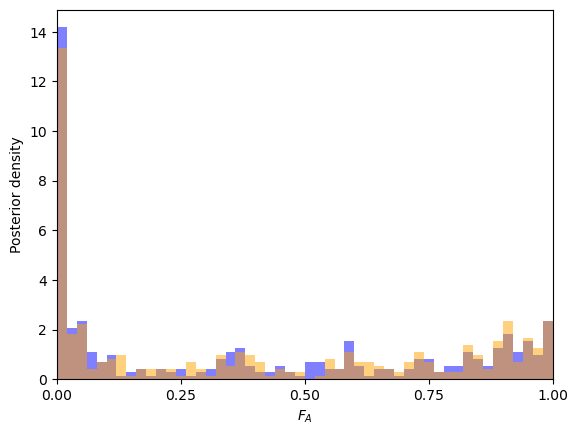

In [23]:
plt.hist(gridsims_means, 50, density=True, color='blue', alpha=.5)
plt.hist(grid2sims_means, 50, density=True, color='orange', alpha=.5)
plt.xlabel('$F_A$')
plt.ylabel('Posterior density')
plt.xlim([0,1])
plt.xticks([0, 0.25, 0.5, 0.75, 1]);

In [19]:
aneu_dom = gridsims_means>.5
aneu_dom2 = grid2sims_means>.5

In [20]:
sum(aneu_dom), sum(aneu_dom)/len(gridsims_means), len(gridsims_means), sum(aneu_dom2), sum(aneu_dom2)/len(grid2sims_means), len(grid2sims_means)

(147, 0.4083333333333333, 360, 152, 0.4222222222222222, 360)

Text(0, 0.5, 'Aneuploidy rate, $\\delta$')

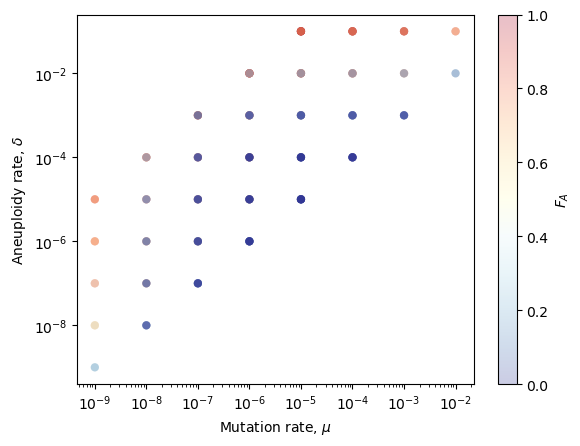

In [70]:
plt.scatter(para_list[:,1],para_list[:,2], c= gridsims_means, cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.25, s=35)
plt.colorbar(label='$F_A$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mutation rate, $\mu$')
plt.ylabel('Aneuploidy rate, $\delta$')

Text(0, 0.5, 'Aneuploidy rate, $\\delta$')

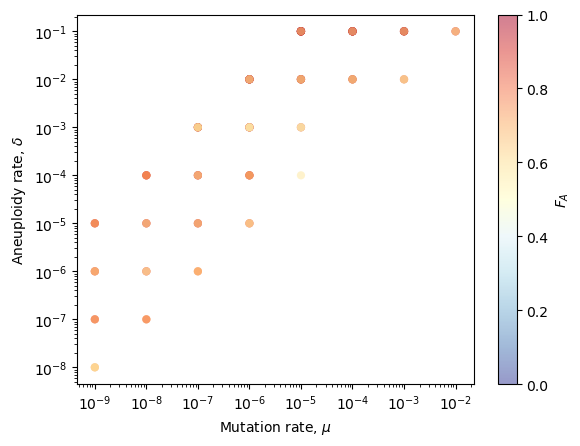

In [72]:
plt.scatter(para_list[aneu_dom,1],para_list[aneu_dom,2], c= gridsims_means[aneu_dom], cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.5, s=35)
plt.colorbar(label='$F_A$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mutation rate, $\mu$')
plt.ylabel('Aneuploidy rate, $\delta$')

Text(0, 0.5, 'Aneuploidy rate, $\\delta$')

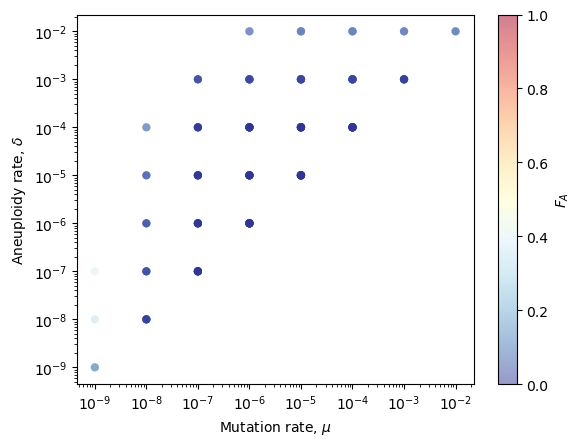

In [73]:
plt.scatter(para_list[~aneu_dom,1],para_list[~aneu_dom,2], c= gridsims_means[~aneu_dom], cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.5, s=35)
plt.colorbar(label='$F_A$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mutation rate, $\mu$')
plt.ylabel('Aneuploidy rate, $\delta$')

Text(0, 0.5, '$w_{2n*}/w_{2n+1}-1$')

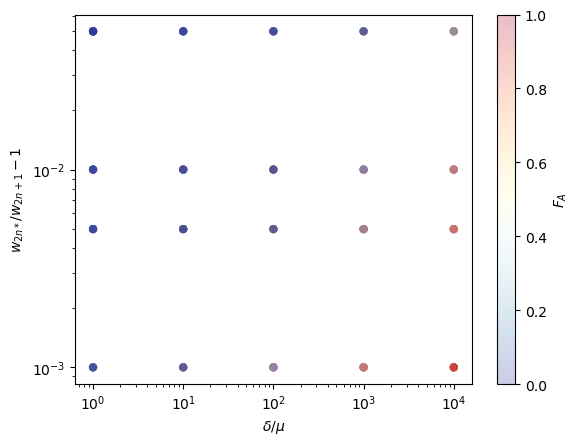

In [77]:
plt.scatter(para_list[:,2]/para_list[:,1], para_list[:,5]/para_list[:,3]-1, c= gridsims_means, cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.25, s=35)
plt.colorbar(label='$F_A$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\delta/\mu$')
plt.ylabel('$w_{2n*}/w_{2n+1}-1$')

Text(0, 0.5, '$w_{2n*}/w_{2n+1}-1$')

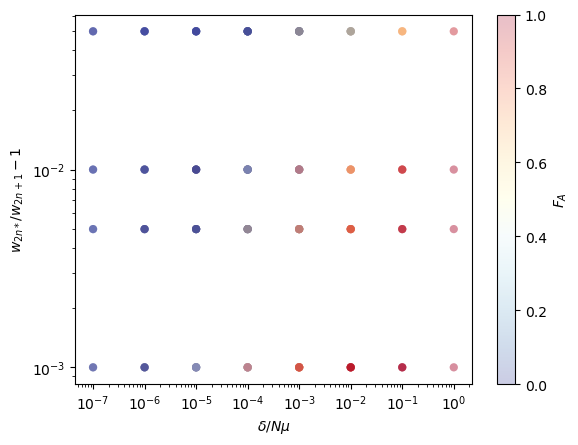

In [123]:
plt.scatter(para_list[:,2]/(para_list[:,1]*para_list[:,0]), para_list[:,5]/para_list[:,3]-1, c= gridsims_means, cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.25, s=35)
plt.colorbar(label='$F_A$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\delta/N\mu$')
plt.ylabel('$w_{2n*}/w_{2n+1}-1$')

Text(0, 0.5, '$w_{2n*}/w_{2n+1}-1$')

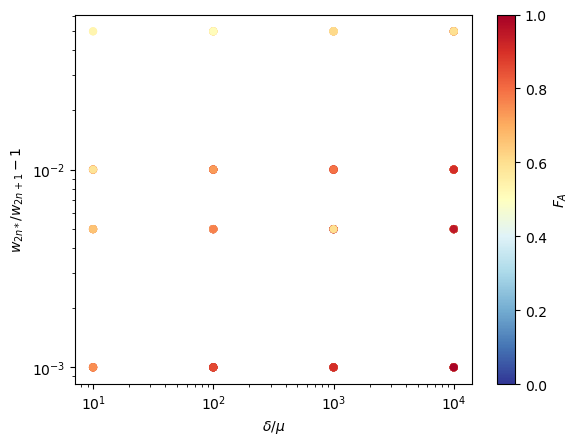

In [84]:
plt.scatter(para_list[aneu_dom,2]/para_list[aneu_dom,1], para_list[aneu_dom,5]/para_list[aneu_dom,3]-1, c= gridsims_means[aneu_dom], cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=1, s=35)
plt.colorbar(label='$F_A$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\delta/\mu$')
plt.ylabel('$w_{2n*}/w_{2n+1}-1$')

Text(0, 0.5, '$w_{2n*}/w_{2n+1}-1$')

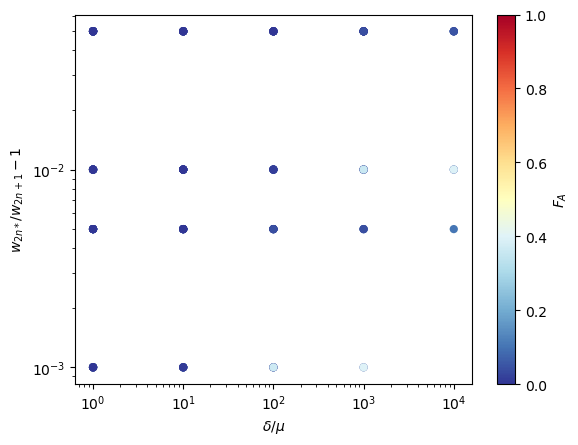

In [83]:
plt.scatter(para_list[~aneu_dom,2]/para_list[~aneu_dom,1], para_list[~aneu_dom,5]/para_list[~aneu_dom,3]-1, c= gridsims_means[~aneu_dom], cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=1, s=35)
plt.colorbar(label='$F_A$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\delta/\mu$')
plt.ylabel('$w_{2n*}/w_{2n+1}-1$')

Text(0, 0.5, '$w_{2n*}/w_{2n+1*}-1$')

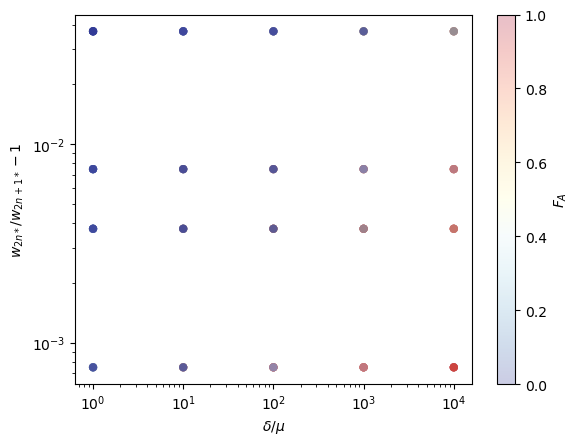

In [78]:
plt.scatter(para_list[:,2]/para_list[:,1], para_list[:,5]/para_list[:,4]-1, c= gridsims_means, cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.25, s=35)
plt.colorbar(label='$F_A$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\delta/\mu$')
plt.ylabel('$w_{2n*}/w_{2n+1*}-1$')

Text(0, 0.5, 'N')

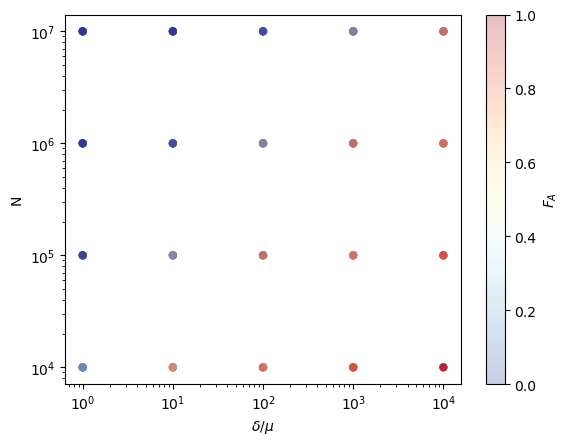

In [125]:
plt.scatter(para_list[:,2]/para_list[:,1], para_list[:,0], c= gridsims_means, cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.25, s=35)
plt.colorbar(label='$F_A$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\delta/\mu$')
plt.ylabel('N')

Text(0, 0.5, 'N')

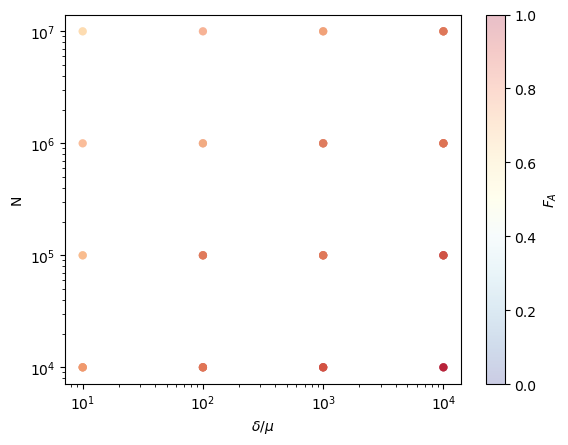

In [126]:
plt.scatter(para_list[aneu_dom,2]/para_list[aneu_dom,1], para_list[aneu_dom,0], c= gridsims_means[aneu_dom], cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.25, s=35)
plt.colorbar(label='$F_A$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\delta/\mu$')
plt.ylabel('N')

Text(0, 0.5, '$F_A$')

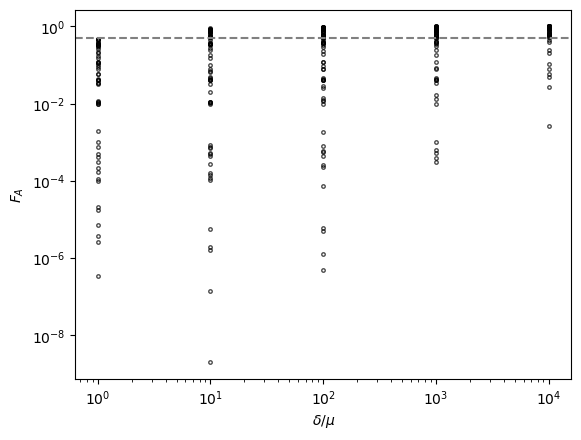

In [163]:
plt.plot(para_list[:,2]/para_list[:,1],gridsims_means,'.',c='k',ms=5, markerfacecolor='none',alpha=.7)
plt.axhline(.5,ls='--',color='gray')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\delta/\mu$')
plt.ylabel('$F_A$')

In [153]:
f=np.array([((para_list[:,1]*para_list[:,0])/para_list[:,2])==x for x in [1,10,100,1000,10000,100000,10**6,10**7]])

In [156]:
Nmuod_mean=np.array([np.array([10**x,np.mean(gridsims_means[f[x]])]) for x in range(len(f))])

In [159]:
Nmuod_mean

array([[1.00000000e+00, 9.81528375e-01],
       [1.00000000e+01, 9.07141885e-01],
       [1.00000000e+02, 7.10498629e-01],
       [1.00000000e+03, 4.26728390e-01],
       [1.00000000e+04, 2.25796686e-01],
       [1.00000000e+05, 2.35362607e-01],
       [1.00000000e+06, 1.59493369e-01],
       [1.00000000e+07, 6.39420260e-02]])

Text(0, 0.5, '$F_A$')

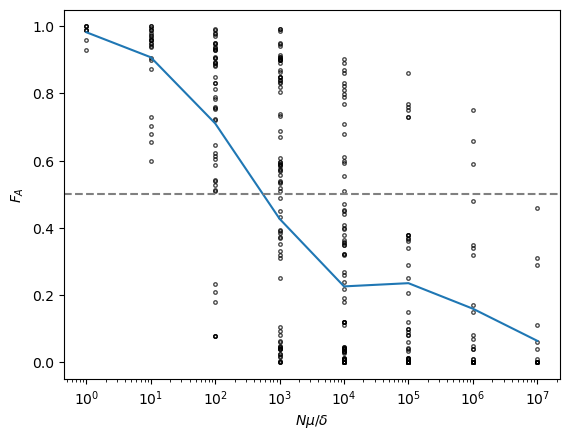

In [161]:
plt.plot((para_list[:,1]*para_list[:,0])/para_list[:,2],gridsims_means,'.',c='k',ms=5, markerfacecolor='none',alpha=.7)
plt.plot(Nmuod_mean.transpose()[0],Nmuod_mean.transpose()[1])
plt.axhline(.5,ls='--',color='gray')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('$N\mu/\delta$')
plt.ylabel('$F_A$')

In [144]:
strongs=para_list[:,-1]>1.05
sum(strongs)

90

Text(0, 0.5, '$F_A$')

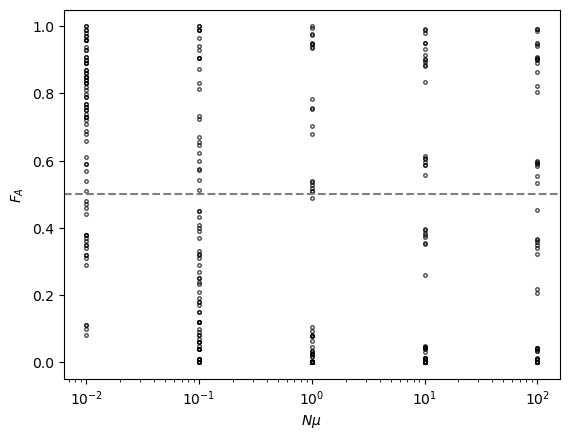

In [128]:
plt.plot((para_list[:,1]*para_list[:,0]),gridsims_means,'.',c='k',ms=5, markerfacecolor='none',alpha=.7)
plt.axhline(.5,ls='--',color='gray')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('$N\mu$')
plt.ylabel('$F_A$')

Text(0, 0.5, '$F_A$')

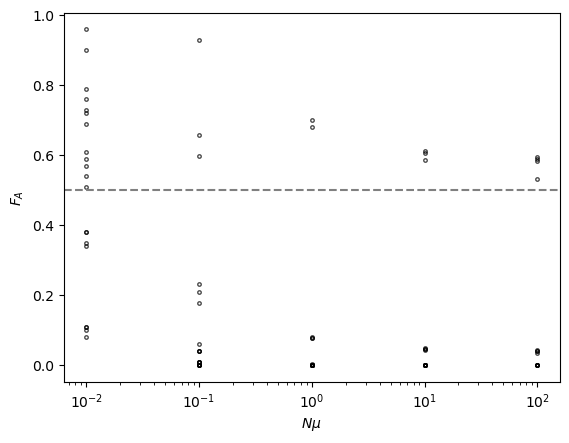

In [145]:
plt.plot((para_list[strongs,1]*para_list[strongs,0]),gridsims_means[strongs],'.',c='k',ms=5, markerfacecolor='none',alpha=.7)
plt.axhline(.5,ls='--',color='gray')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('$N\mu$')
plt.ylabel('$F_A$')

Text(0, 0.5, 'Aneuploidy rate, $\\delta$')

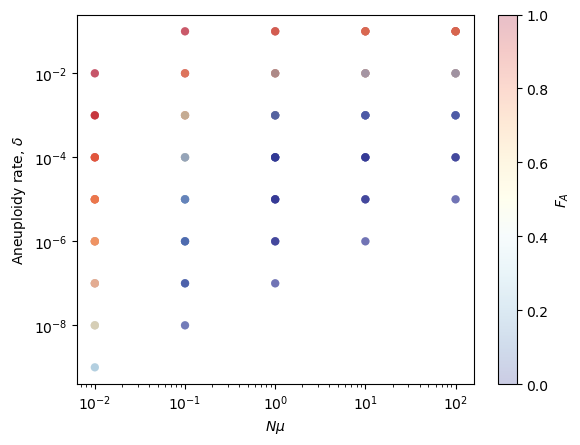

In [90]:
plt.scatter(para_list[:,1]*para_list[:,0],para_list[:,2], c= gridsims_means, cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.25, s=35)
plt.colorbar(label='$F_A$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$N\mu$')
plt.ylabel('Aneuploidy rate, $\delta$')

Text(0, 0.5, 'Aneuploidy rate, $\\delta$')

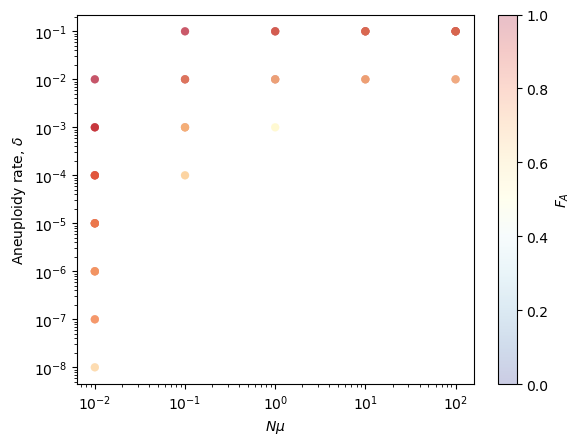

In [91]:
plt.scatter(para_list[aneu_dom,1]*para_list[aneu_dom,0],para_list[aneu_dom,2], c= gridsims_means[aneu_dom], cmap="RdYlBu_r", vmin=0, vmax=1, ec=None, alpha=.25, s=35)
plt.colorbar(label='$F_A$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$N\mu$')
plt.ylabel('Aneuploidy rate, $\delta$')